https://qiita.com/kenmatsu4/items/2a8573e3c878fc2da306

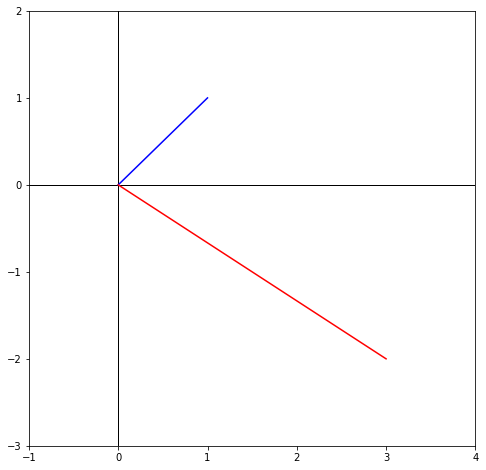

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation as ani

plt.figure(figsize=(8,8))
n=20

A = [[ 2, 1],
     [-0.5,-1.5]]
x = [1, 1]

a = np.dot(A, x)   # ここでAxを計算している

plt.plot([0, x[0]], [0, x[1]], "b", zorder=100)
plt.plot([0, a[0]], [0, a[1]], "r", zorder=100)

plt.plot([-15,50],[0,0],"k", linewidth=1)
plt.plot([0,0],[-40,40],"k", linewidth=1)
plt.xlim(-1,4)
plt.ylim(-3,2)
plt.show()


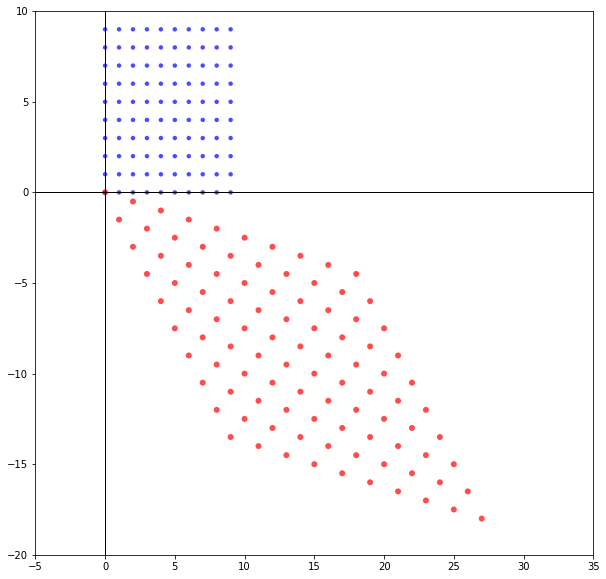

In [5]:
plt.figure(figsize=(10,10))
n=10
xmin = -5
xmax =  35
ymin = -20
ymax =  10

A = [[ 2, 1],
     [-0.5,-1.5]]
for i in range(n):
    for j in range(n):
        x=j
        y=i

        a = np.dot(A, [x, y])

        plt.scatter(x,  y,  facecolor="b", edgecolors='none', alpha=.7, s=20)
        plt.scatter(a[0], a[1], facecolor="r", edgecolors='none', alpha=.7)

        plt.plot([xmin,xmax],[0,0],"k", linewidth=1)
        plt.plot([0,0],[ymin,ymax],"k", linewidth=1)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
plt.show()

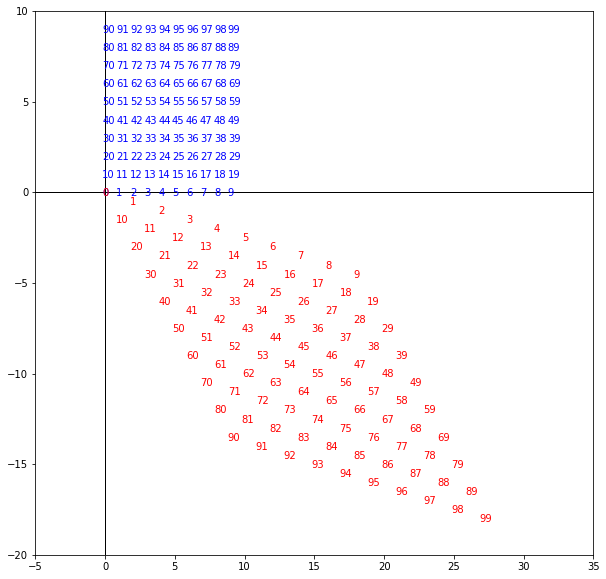

In [6]:
plt.figure(figsize=(10,10))
n=10
xmin = -5
xmax =  35
ymin = -20
ymax =  10

A = [[ 2, 1],
     [-0.5,-1.5]]
for i in range(n):
    for j in range(n):
        x=j
        y=i

        a = np.dot(A, [x, y])

        loc_adjust = .2  # 表示位置の調整
        plt.text(x-loc_adjust, y-loc_adjust, "%d"%(i*n + j), color="blue")
        plt.text(a[0]-loc_adjust, a[1]-loc_adjust, "%d"%(i*n + j), color="red")

        plt.plot([xmin,xmax],[0,0],"k", linewidth=1)
        plt.plot([0,0],[ymin,ymax],"k", linewidth=1)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
plt.show()

In [8]:
la, v = np.linalg.eig(A)
print ("la",la)
print ("v",v)

la [ 1.85078106 -1.35078106]
v [[ 0.98904939 -0.28597431]
 [-0.1475849   0.95823729]]


/Users/tsuiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


S [[2.6774093  1.93221432]
 [1.93221432 3.05844013]]
la [0.92634075 4.80950869]
v [[-0.74098708 -0.67151928]
 [ 0.67151928 -0.74098708]]


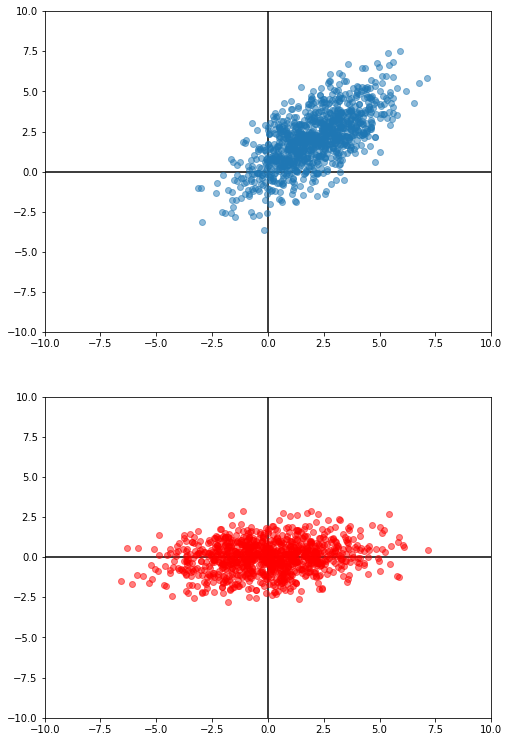

In [10]:
np.random.seed(0)
xmin = -10
xmax =  10
ymin = -10
ymax =  10

#平均
mu = [2,2]
#共分散
cov = [[3,2.3],[1.8,3]]

# 2変量正規分布の乱数生成
x, y = np.random.multivariate_normal(mu,cov,1000).T

av_x = np.average(x)
av_y = np.average(y)

# 分散共分散行列をデータより算出
S = np.cov(x, y)
print ("S", S)

# 固有値、固有ベクトルを算出
la, v = np.linalg.eig(S)

print ("la", la)
print ("v", v)

# 原点が中心になるようスライドさせる
x2 = x - av_x
y2 = y - av_y

# 原点をスライドしたデータに、固有ベクトルを並べて作った行列をかける
a1 = np.array([np.dot(v, [x2[i],y2[i]]) for i in range(len(x))])

# グラフの描画
plt.figure(figsize=(8, 13))

# 元データのプロット
plt.subplot(211)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(x, y, alpha=0.5, zorder=100)
plt.plot([0, 0], [ymin, ymax], "k")
plt.plot([xmin, xmax], [0, 0], "k")

# 固有ベクトルを並べて作った行列をかけたデータのプロット
plt.subplot(212)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(a1[:,0], a1[:,1], c="r", alpha=0.5, zorder=100)
plt.plot([0, 0], [ymin, ymax], "k")
plt.plot([xmin, xmax], [0, 0], "k")
plt.show()
